In [1]:
import numpy as np
import pandas as pd
import operator

# reading data                                                                                                                                                   
prior_orders = pd.read_csv('../data/order_products__prior.csv', dtype=np.int32, index_col=0)
train_orders = pd.read_csv('../data/order_products__train.csv', dtype=np.int32, index_col=0)
orders = pd.read_csv('../data/orders.csv', index_col=0)

# removing all user_ids not in the test set                                                                                                                      
test  = orders[orders['eval_set'] == 'test' ]
user_ids = test['user_id'].values
orders = orders[orders['user_id'].isin(user_ids)]

/home/joe/kaggle/mercedes/.env/lib/python3.5/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
prior_products = pd.DataFrame(
    prior_orders.groupby('order_id')['product_id'].apply(list)
)

In [6]:
train_products = pd.DataFrame(
    train_orders.groupby('order_id')['product_id'].apply(list)
)

In [7]:
prior = orders[orders['eval_set'] == 'prior']

In [11]:
prior['num_orders'] = prior.groupby(['user_id'])['order_number'].transform(max)

/home/joe/kaggle/mercedes/.env/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
prior["products"] = prior_products
prior.head()

/home/joe/kaggle/mercedes/.env/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,num_orders,products
order_id,,,,,,,,
1374495,3,prior,1,1,14,NaN,12,"[9387, 17668, 15143, 16797, 39190, 47766, 2190..."
444309,3,prior,2,3,19,9.0,12,"[38596, 21903, 248, 40604, 8021, 17668, 21137,..."
3002854,3,prior,3,3,16,21.0,12,"[39190, 47766, 21903, 49683, 28373, 7503]"
2037211,3,prior,4,2,18,20.0,12,"[1819, 12845, 9387, 16965, 24010]"
2710558,3,prior,5,0,17,12.0,12,"[39190, 9387, 17668, 47766, 16965, 28373, 2190..."


In [26]:
prior.groupby("user_id").last()

,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,num_orders,products
user_id,,,,,,,
3,prior,12,1,15,15.0,12,"[39190, 18599, 23650, 21903, 47766, 24810]"
4,prior,5,5,13,0.0,5,"[26576, 25623, 21573]"
6,prior,3,2,18,12.0,3,"[49401, 25659, 8424]"
11,prior,7,5,9,30.0,7,"[24799, 17706, 33572, 27959, 48697, 49374, 830..."
12,prior,5,1,9,30.0,5,"[13176, 14992, 44422, 11520, 31506, 22959, 712..."
15,prior,22,1,10,14.0,22,"[196, 10441]"
16,prior,6,0,14,26.0,6,"[17948, 24561, 15872, 21405, 21137, 24852, 141..."
19,prior,9,5,16,8.0,9,"[42913, 34690, 25170, 47805, 41483, 40974, 288..."
20,prior,4,2,11,7.0,4,"[41400, 46061, 22362, 13914, 13575, 9387, 6184]"


In [30]:
sub = test.join(prior.groupby("user_id").last()["products"], on="user_id")

In [34]:
sub["products"] = sub["products"].apply(lambda x: " ".join(str(a) for a in x))

In [35]:
sub[["products"]].to_csv("misfyre_sub.csv.gz", compression="gzip")

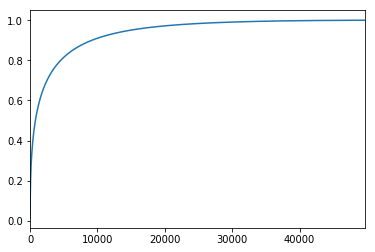

In [25]:
(counts.cumsum()/32434489).reset_index()["product_id"].plot()